<a href="https://colab.research.google.com/github/stefymojica/MACC/blob/main/intro_Mesa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial introductorio

**El modelo de riqueza de Boltzmann**

La premisa de este tutorial es crear un modelo de nivel inicial que represente a agentes que intercambian dinero. Este intercambio de dinero afecta la riqueza.

A continuación, se agrega *espacio* para permitir que los agentes se muevan en función del cambio en la riqueza a medida que avanza el tiempo.

Luego se utilizan dos de las herramientas analíticas de Mesa: el *recopilador de datos* y el *ejecutor de lotes* para examinar la dinámica de este modelo simple.

## Descripción del modelo

Se trata de una economía basada en agentes simulada de nivel inicial. En una economía basada en agentes, se estudia el comportamiento de un agente económico individual, como un consumidor o un productor, en un entorno de mercado [[Drăgulescu, 2002]](https://arxiv.org/pdf/cond-mat/0211175).

Los supuestos que rigen este modelo son:

1. Hay una cierta cantidad de agentes.
2. Todos los agentes comienzan con 1 unidad de dinero.
3. En cada paso del modelo, un agente da 1 unidad de dinero (si la tiene) a otro agente.

Estos pasos elementales permiten describir sistemas económicos complejos con predicciones consistentes.

Inicio - Instalación de paquetes

El signo % es llamado *Magic Comand* es recomendado en entornos interactivos en los se se ejecutan códigos por secciones.

In [1]:
%pip install mesa --quiet
%pip install seaborn --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.0/197.0 kB 3.2 MB/s eta 0:00:00


Este código funciona para la versión 3.2.0 de mesa

In [2]:
import mesa
print(mesa.__version__)

3.2.0


Importar librerías

In [3]:
# Herramientas de visualización
import seaborn as sns
import matplotlib.pyplot as plt

# Herramienta para cálculo numérico y para manipulación de arreglos (vectores y matrices)
import numpy as np

# Herramienta para la creación, lectura y manipulación de DataFrames
import pandas as pd

**Crear agentes**

Modelo: Los agentes son individuos que intercambian dinero, en este caso la cantidad de dinero que tiene un agente representa su riqueza (wealth). Cada agente tiene un número de identificación único.

Implementación: Se crea una nueva clase (y nuevos objetos) que extiende mesa.Agent y crea una subclase de la clase Agent de mesa. La nueva clase es llamada MoneyAgent.

In [4]:
class MoneyAgent(mesa.Agent):
    """An agent with fixed initial wealth."""

    def __init__(self, model):
        # Pass the parameters to the parent class.
        super().__init__(model)

        # Create the agent's variable and set the initial values.
        self.wealth = 1

Recordar la revisión hecha respecto a la **herencia** de clases.

**Crear modelo**

Ahora se crea el modelo. Progresivamente se agregan funciones al modelo.

**Información específica del modelo:** Cuando se crea un modelo, se especifica la cantidad de agentes dentro del modelo. El modelo también contiene un programador (agenda) que controla el orden en el que se activan los agentes. El programador también es responsable de avanzar el modelo un paso. El modelo también contiene un recopilador de datos que recopila datos del modelo. Estos temas se tratarán con más detalle más adelante en el tutorial.

Se crea una nueva clase llamada `MoneyModel`.

In [5]:
class MoneyModel(mesa.Model):
    """A model with some number of agents."""

    def __init__(self, n, seed = None):
        super().__init__(seed = seed)
        self.num_agents = n
        # Create agents
        MoneyAgent.create_agents(model = self, n = n)

**Hacer que los agentes** ``hagan``

Una vez creados los conceptos básicos de la clase Agente y la clase Modelo, ahora podemos activar los agentes para que hagan cosas.

**Antecedentes**: La función `do` de Mesa invoca funciones de agente para hacer crecer su ABM (Agent-Based Model). Un paso es la unidad de tiempo más pequeña del modelo y, a menudo, se lo denomina tick. La función do y la funcionalidad de Python se pueden configurar para activar agentes en diferentes órdenes. Esto puede ser importante, ya que el orden en el que se activan los agentes puede afectar los resultados del modelo. En cada paso del modelo, uno o más de los agentes (normalmente todos) se activan y realizan su propio paso, cambiando internamente o interactuando entre sí o con el entorno.

**Información específica del modelo**: Para esta sección, reordenaremos aleatoriamente el orden de activación del agente utilizando mesa.Agent.shuffle_do y haremos que la función de paso de los agentes imprima la identificación única del agente que se les asignó durante el proceso de creación del agente.

**Implementación del código**: Utilizando la convención estándar de ABM, agregamos una función de paso a la clase MoneyModel que invoca la función mesa.Agent.shuffle_do. Luego pasamos a shuffle_do el parámetro "step". Esto le indica a mesa que busque y ejecute la función step en nuestra clase MoneyAgent.

In [6]:
class MoneyAgent(mesa.Agent):
    """An agent with fixed initial wealth."""

    def __init__(self, model):
        # Pass the parameters to the parent class.
        super().__init__(model)

        # Create the agent's attribute and set the initial values.
        self.wealth = 1

    def say_hi(self):
        # The agent's step will go here.
        # For demonstration purposes we will print the agent's unique_id
        print(f"Hi, I am an agent, you can call me {str(self.unique_id)}.")


class MoneyModel(mesa.Model):
    """A model with some number of agents."""

    def __init__(self, n, seed = None):
        super().__init__(seed = seed)
        self.num_agents = n

        # Create n agents
        MoneyAgent.create_agents(model = self, n = n)

    def step(self):
        """Advance the model by one step."""

        # This function psuedo-randomly reorders the list of agent objects and
        # then iterates through calling the function passed in as the parameter
        self.agents.shuffle_do("say_hi")
        #self.agents.do("say_hi")

Corriendo el modelo

In [7]:
starter_model = MoneyModel(10)
starter_model.step()

Hi, I am an agent, you can call me 1.
Hi, I am an agent, you can call me 7.
Hi, I am an agent, you can call me 9.
Hi, I am an agent, you can call me 8.
Hi, I am an agent, you can call me 4.
Hi, I am an agent, you can call me 3.
Hi, I am an agent, you can call me 2.
Hi, I am an agent, you can call me 5.
Hi, I am an agent, you can call me 6.
Hi, I am an agent, you can call me 10.


Exercise: Verify that

## <font color="red"> **Ejercicios** </font>

* ¿Se tiene el mismo resultado en cada ejecución del código?
* ¿Cuál es la diferencia entre usar `shuffle_do` o `do`?
* ¿Qué pasa al fijar una semilla? Fijar `seed = 42`

* Modificar el código a continuación para que cada agente imprima su "riqueza" cuando se activa. Cree un modelo para 12 agentes y ejecútelo durante algunos pasos para ver el resultado.

In [15]:
class MoneyAgent(mesa.Agent):
    """An agent with fixed initial wealth."""

    def __init__(self, model):
        # Pass the parameters to the parent class.
        super().__init__(model)

        # Create the agent's variable and set the initial values.
        self.wealth = 1

    def say_wealth(self):
        # The agent's step will go here.
        # FIXME: need to print the agent's wealth
        print(f"Hi, I am an agent and I am broke!")

Solución:

In [9]:
#modelo12.step()

**Paso del agente**

Volviendo a MoneyAgent, ahora se creará el proceso de intercambio real.

**Antecedentes**: aquí es donde se define el comportamiento del agente en relación con cada paso o marca del modelo.

**Información específica del modelo**: en este caso, el agente verificará su riqueza y, si tiene dinero, regalará una unidad de este a otro agente aleatorio.

**Implementación del código**: el método de paso del agente es llamado por mesa.Agent.shuffle_do("exchange") durante cada paso del modelo. Para permitir que el agente elija otro agente al azar, usamos el generador de números aleatorios model.random. Esto funciona igual que el módulo aleatorio de Python, pero si se establece un conjunto de semillas fijo cuando se crea una instancia del modelo (consulte el desafío anterior), esto permite a los usuarios replicar una ejecución de modelo específica más tarde. Una vez que identificamos este otro objeto de agente, aumentamos su riqueza en 1 y disminuimos la riqueza de este agente en uno.

Esto actualiza la función de paso como se muestra a continuación

In [10]:
class MoneyAgent(mesa.Agent):
    """An agent with fixed initial wealth."""

    def __init__(self, model):
        # Pass the parameters to the parent class.
        super().__init__(model)

        # Create the agent's variable and set the initial values.
        self.wealth = 1

    def exchange(self):
        # Verify agent has some wealth
        if self.wealth > 0:
            other_agent = self.random.choice(self.model.agents)
            if other_agent is not None:
                  other_agent.wealth += 1  # ?
                  self.wealth -= 1  # ?


class MoneyModel(mesa.Model):
    """A model with some number of agents."""

    def __init__(self, n):
        super().__init__()
        self.num_agents = n

        # Create agents
        MoneyAgent.create_agents(model=self, n=n)

    def step(self):
        """Advance the model by one step."""

        # This function psuedo-randomly reorders the list of agent objects and
        # then iterates through calling the function passed in as the parameter
        self.agents.shuffle_do("exchange")

### Ejecución de su primer modelo

Con esa última pieza en la mano, es hora de la primera ejecución rudimentaria del modelo.

Ahora, creemos un modelo con 10 agentes y ejecútelo durante 15 pasos.

In [11]:
model = MoneyModel(10)  # Tells the model to create 10 agents
for _ in range(15):  # Runs the model for 15 steps
    model.step()

A continuación, necesitamos obtener algunos datos del modelo. En concreto, queremos ver la distribución de la riqueza del agente. Podemos obtener los valores de riqueza con **comprensión de listas** y, a continuación, utilizar Seaborn para visualizar los datos en un histograma.

In [12]:
agent_wealth = [a.wealth for a in model.agents]
agent_wealth

[1, 1, 1, 0, 0, 2, 3, 0, 2, 0]

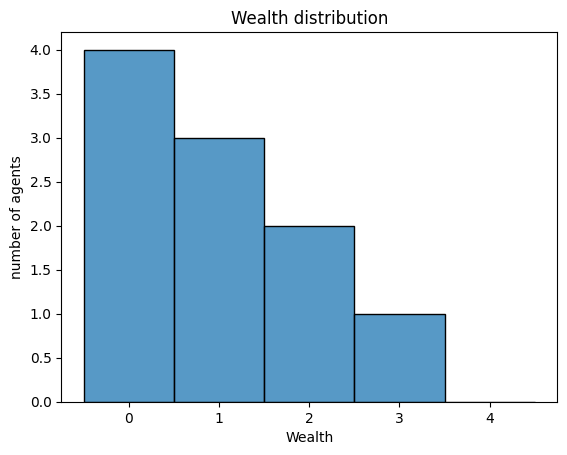

In [13]:
# Create a histogram with seaborn
g = sns.histplot(agent_wealth, discrete=True, binrange=(0, 4))
g.set(title="Wealth distribution", xlabel="Wealth", ylabel="number of agents");
    # The semicolon is just to avoid printing the object representation

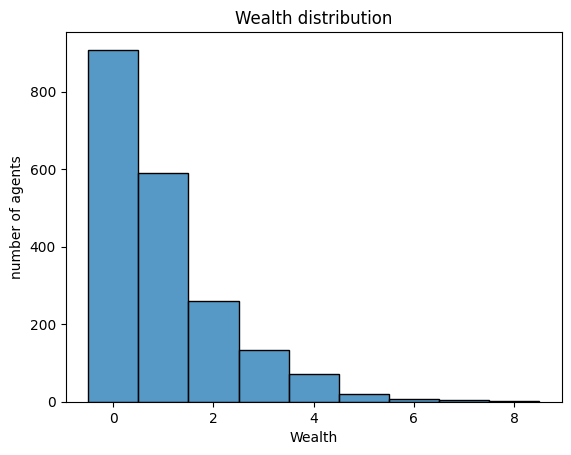

In [14]:
all_wealth = []
# This runs the model 100 times, each model executing 10 steps.
for _ in range(100):
    # Run the model
    model = MoneyModel(20)
    for _ in range(20):
        model.step()

    # Store the results
    for agent in model.agents:
        all_wealth.append(agent.wealth)

# Use seaborn
g = sns.histplot(all_wealth, discrete=True)
g.set(title="Wealth distribution", xlabel="Wealth", ylabel="number of agents");

Deberían ver algo parecido a la distribución anterior. Es casi seguro que la de ustedes se verá al menos ligeramente diferente, ya que cada ejecución del modelo es aleatoria.

#<font color="red"> **Ejercicios** </font>

1. Verifique si la riqueza total del modelo permanece conservada en cada paso. Graficarla.
2. Experimente con diferentes valores de riqueza inicial. ¿Qué cambia en la dinámica?
3. Monitoree cuántos agentes tienen riqueza cero en el tiempo.
4. Simule un caso más realista en el que la transacción tiene un costo. El cambio en la riqueza en el agente que da dinero es -1, mientras que el cambio en el que gana es +0.9. Verifique si la riqueza total del modelo permanece conservada en cada paso.
5. Proponga una modificación adicional del modelo y examine sus implicaciones en la dinámica.

In [52]:
class MoneyAgent(mesa.Agent):
    """An agent with fixed initial wealth."""

    def __init__(self, model):
        # Pass the parameters to the parent class.
        super().__init__(model)

        # Create the agent's variable and set the initial values.
        self.wealth = 1

    def exchange(self):
        # Verify agent has some wealth
        if self.wealth > 0:
            other_agent = self.random.choice(self.model.agents)
            if other_agent is not None:
                  other_agent.wealth += 0.9  # ?
                  self.wealth -= 1  # ?


class MoneyModel(mesa.Model):
    """A model with some number of agents."""

    def __init__(self, n):
        super().__init__()
        self.num_agents = n

        # Create agents
        MoneyAgent.create_agents(model=self, n=n)

    def step(self):
        """Advance the model by one step."""

        # This function psuedo-randomly reorders the list of agent objects and
        # then iterates through calling the function passed in as the parameter
        self.agents.shuffle_do("exchange")

In [53]:
model = MoneyModel(10)  # Tells the model to create 10 agents
for _ in range(15):  # Runs the model for 15 steps
    model.step()

In [54]:
agent_wealth = [a.wealth for a in model.agents]
agent_wealth

[-0.6000000000000001,
 0.29999999999999993,
 -1.1102230246251565e-16,
 -0.4000000000000006,
 0.7000000000000002,
 -0.10000000000000087,
 0.7,
 -0.20000000000000018,
 -0.6999999999999997,
 0.10000000000000009]

In [55]:
#Verifique si la riqueza total del modelo permanece conservada en cada paso. Graficarla.
model = MoneyModel(10)
total_wealth = []

for _ in range(15):  # Runs the model for 15 steps
    model.step()

    wealth_sum = sum(a.wealth for a in model.agents)
    total_wealth.append(wealth_sum)

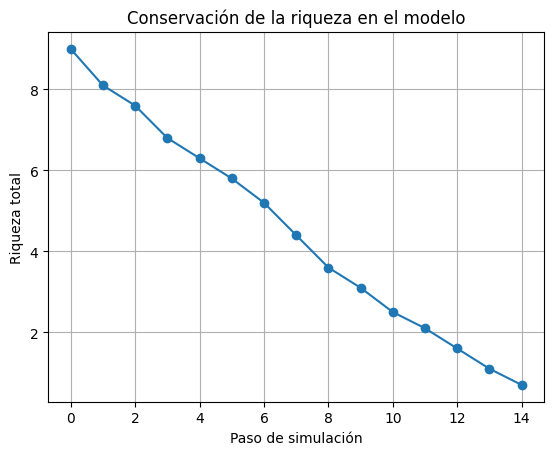

In [56]:
plt.plot(total_wealth, marker="o")
plt.xlabel("Paso de simulación")
plt.ylabel("Riqueza total")
plt.title("Conservación de la riqueza en el modelo")
plt.grid(True)
plt.show()
